# Leonard Kramer fault diagnosis problem

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
import winsound
np.set_printoptions(precision=6,suppress=True)
%matplotlib inline

Using TensorFlow backend.


In [3]:
#Generating the patterns
n = 300 # of Patterns (multiple of 3)
patterns = np.zeros([n,5])
count = 0
i=[0,0,0,0]
i[0]=0
i[1]=int(n/3)
i[2]=int(2*n/3)
i[3]=int(n)
sd1=.25
sd2=.015
tr=.05
np.random.seed(123)

def cond(p1,p2,flag): 
    if flag==1: # Normal operating conditions
        return(abs(p1)<tr and abs(p2)<tr)
    elif flag==2: #Type 1 error
        return(abs(p1)>tr and abs(p2)<tr)
    elif flag==3: #Type 2 error
        return(abs(p1)<tr and abs(p2)>tr)


for pos,idx in enumerate(i):
    while count < idx:
        p1 = np.random.normal(0,sd1)
        p2 = np.random.normal(0,sd1)
        v1 = np.random.normal(0,sd2)
        v2 = np.random.normal(0,sd2)
        if cond(p1,p2,pos):
            patterns[count,0] = p1+p2+v1
            patterns[count,1] = p1-p2+v2
            patterns[count,pos+1] = 1
            count += 1
x_train = patterns[:,0:2]
y_train = patterns[:,2:]

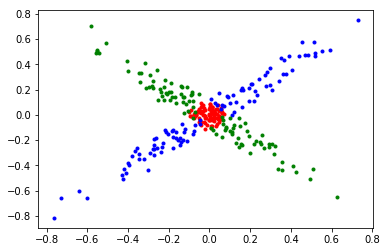

In [4]:
plt.plot(x_train[i[0]:i[1],0],x_train[i[0]:i[1],1],'r.',
         x_train[i[1]:i[2],0],x_train[i[1]:i[2],1],'b.',
         x_train[i[2]:i[3],0],x_train[i[2]:i[3],1],'g.',)
plt.show()

In [5]:
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [6]:
%%time
np.random.seed(321)
model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=2))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1000, batch_size=1,verbose=0)
loss_and_metrics = model.evaluate(x_train, y_train)
print(loss_and_metrics)

 32/300 [==>...........................] - ETA: 0s[0.1070519949014609, 0.94666666666666666]
Wall time: 4min 49s


In [7]:
%%time
np.random.seed(321)
model = Sequential()
model.add(Dense(units=8, activation='tanh', input_dim=2))
#model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=1000, batch_size=1,verbose=0)
loss_and_metrics = model.evaluate(x_train, y_train)
print(loss_and_metrics)

 32/300 [==>...........................] - ETA: 0s[0.11342318900036237, 0.95666666666666667]
Wall time: 5min 2s


In [8]:
%%time
np.random.seed(321)
model = Sequential()
model.add(Dense(units=5, activation='tanh', input_dim=2,name="l1"))
model.add(Dense(units=3, activation='tanh',name="l2"))
model.add(Dense(units=2, activation='tanh',name="l3"))
model.add(Dense(units=2, activation='tanh',name="l4"))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
callbacks = ModelCheckpoint('bestfit.hdf5',save_best_only=True)
history = model.fit(x_train, y_train, epochs=2000, batch_size=1,verbose=0,
                    callbacks=[callbacks],validation_data=(x_train,y_train))
loss_and_metrics = model.evaluate(x_train, y_train)
print(loss_and_metrics)
winsound.Beep(2500,200)

 32/300 [==>...........................] - ETA: 0s[0.24123610893885294, 0.91666666666666663]
Wall time: 18min 15s


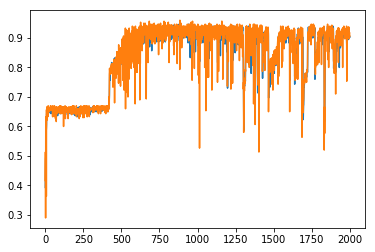

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

In [10]:
modeltemp = load_model('bestfit.hdf5')
modeltemp.evaluate(x_train,y_train)

 32/300 [==>...........................] - ETA: 0s

[0.21272383173306783, 0.94666666666666666]

In [11]:
swap = model
model = modeltemp
modeltemp = swap
inter1 = Model(inputs=model.input, outputs=model.get_layer('l1').output)
inter2 = Model(inputs=model.input, outputs=model.get_layer('l2').output)
inter3 = Model(inputs=model.input, outputs=model.get_layer('l3').output)
inter4 = Model(inputs=model.input, outputs=model.get_layer('l4').output)
interout1 = inter1.predict(x_train)
interout2 = inter2.predict(x_train)
interout3 = inter3.predict(x_train)
interout4 = inter4.predict(x_train)

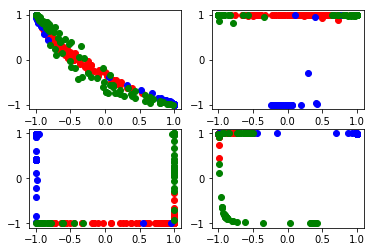

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(interout1[i[0]:i[1],1],interout1[i[0]:i[1],0],'ro',
         interout1[i[1]:i[2],1],interout1[i[1]:i[2],0],'bo',
         interout1[i[2]:i[3],1],interout1[i[2]:i[3],0],'go')
ax2.plot(interout2[i[0]:i[1],1],interout2[i[0]:i[1],0],'ro',
         interout2[i[1]:i[2],1],interout2[i[1]:i[2],0],'bo',
         interout2[i[2]:i[3],1],interout2[i[2]:i[3],0],'go')
ax3.plot(interout3[i[0]:i[1],1],interout3[i[0]:i[1],0],'ro',
         interout3[i[1]:i[2],1],interout3[i[1]:i[2],0],'bo',
         interout3[i[2]:i[3],1],interout3[i[2]:i[3],0],'go')
ax4.plot(interout4[i[0]:i[1],1],interout4[i[0]:i[1],0],'ro',
         interout4[i[1]:i[2],1],interout4[i[1]:i[2],0],'bo',
         interout4[i[2]:i[3],1],interout4[i[2]:i[3],0],'go')
plt.show()

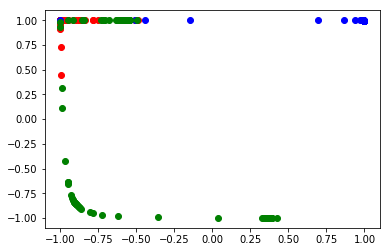

In [13]:
plt.plot(interout4[i[0]:i[1],1],interout4[i[0]:i[1],0],'ro',
         interout4[i[1]:i[2],1],interout4[i[1]:i[2],0],'bo',
         interout4[i[2]:i[3],1],interout4[i[2]:i[3],0],'go')
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_train)
confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred,axis=1))

array([[96,  0,  4],
       [ 2, 95,  3],
       [ 7,  0, 93]], dtype=int64)

In [15]:
#%%time
#model = Sequential()
#model.add(Dense(units=2, activation='linear', input_dim=2))
#model.add(Dense(units=2, activation='linear',name="lala"))
#model.add(Dense(units=2, activation='linear'))
#model.add(Dense(units=2, activation='linear'))
#model.add(Dense(units=3, activation='softmax'))
#model.compile(loss='categorical_crossentropy',
#              optimizer='sgd',
#              metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=10, batch_size=1,verbose=0)
#loss_and_metrics = model.evaluate(x_train, y_train)
#print(loss_and_metrics)
# Didn't work at all